In [1]:
import bs4 as bs
import textblob
import matplotlib.pyplot as plt
import seaborn as sns
import re
import urllib.request    

In [2]:
source = urllib.request.urlopen('https://www.reuters.com/article/us-global-oil/oil-prices-climb-as-u-s-set-to-end-iran-sanction-waivers-idUSKCN1RY00J').read()
soup = bs.BeautifulSoup(source,'lxml')
# title of the page
print(soup.title)

<title>
                Oil hits 2019 high on U.S. plan to tighten squeeze on Iran - Reuters</title>


In [3]:
# get attributes:
print(soup.title.name)

title


In [4]:
# get values:
print(soup.title.string)


                Oil hits 2019 high on U.S. plan to tighten squeeze on Iran - Reuters


In [5]:
# beginning navigation:
print(soup.title.parent.name)

head


In [6]:
for Pr in soup.find_all('p'):
    # print(paragraph.string)
    Pr = str(Pr.text)
    print(Pr)

3 Min Read
NEW YORK (Reuters) - Oil prices jumped more than 2 percent on Monday to a near six-month high, on growing concern about tight global supplies after the United States announced a further clampdown on Iranian oil exports. 
Washington said it will eliminate in May all waivers allowing eight economies to buy Iranian oil without facing U.S. sanctions. 
“The geopolitical risk premium is back in the oil market, in a big way,” said John Kilduff, a partner at Again Capital LLC in New York. “Most, if not all, legitimate commercial interests will avoid Iran oil purchases. Iran’s flow will be reduced to a trickle.” 
Brent crude futures  rose $1.77, or 2.5 percent, to $73.74 a barrel by 11:02 a.m. EDT (1502 GMT). The session high of $74.31 a barrel for the international benchmark was the highest since Nov. 1. 
U.S. West Texas Intermediate crude futures  climbed $1.37, or 2.1 percent, to $65.37 a barrel. The contract hit $65.87 a barrel, the highest since Oct. 31. 
In November, the United

In [7]:
Paragraph_data = ""
sentiment=[]
for Pr in soup.find_all('p'):
    Pr = Pr.text
    Pr = re.sub('[h]+[t]+[t]+[p]+[a-z0-9A-Z./:]+','',Pr) # removing url
    print(Pr)
    Paragraph_data = Paragraph_data+' '+Pr
    Pr = textblob.TextBlob(Pr)
    if Pr.sentiment.polarity>0.01:
        print("positive")
        sentiment.append("positive")
    elif Pr.sentiment.polarity<-0.01:
        print("negative")
        sentiment.append("negative")
    else:
        print("Neutral")
        sentiment.append("neutral")
    print(" ")

3 Min Read
Neutral
 
NEW YORK (Reuters) - Oil prices jumped more than 2 percent on Monday to a near six-month high, on growing concern about tight global supplies after the United States announced a further clampdown on Iranian oil exports. 
positive
 
Washington said it will eliminate in May all waivers allowing eight economies to buy Iranian oil without facing U.S. sanctions. 
Neutral
 
“The geopolitical risk premium is back in the oil market, in a big way,” said John Kilduff, a partner at Again Capital LLC in New York. “Most, if not all, legitimate commercial interests will avoid Iran oil purchases. Iran’s flow will be reduced to a trickle.” 
positive
 
Brent crude futures  rose $1.77, or 2.5 percent, to $73.74 a barrel by 11:02 a.m. EDT (1502 GMT). The session high of $74.31 a barrel for the international benchmark was the highest since Nov. 1. 
positive
 
U.S. West Texas Intermediate crude futures  climbed $1.37, or 2.1 percent, to $65.37 a barrel. The contract hit $65.87 a barrel

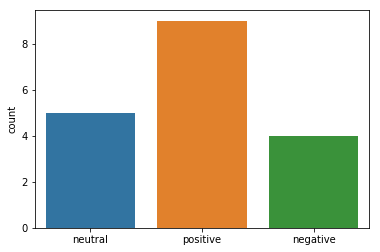

In [8]:
sns.countplot(sentiment)
plt.savefig('static/plot2.jpg')
plt.show()

In [9]:
# pip install wordcloud
import wordcloud
wd = wordcloud.WordCloud(max_words=10).generate_from_text(Paragraph_data)

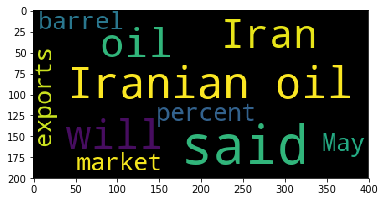

In [10]:
plt.imshow(wd)
plt.savefig('static/wordcloud2.jpg')
plt.show()

# my code

fnfhn